In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

## 1. Линейная регрессия. Реализация

In [3]:
data = load_boston()
data['data'].shape

(506, 13)

In [5]:
type(data['data'])

numpy.ndarray

In [652]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1.1. Реализация линейной регрессии с использованием матричных операций

Линейная регрессия выражается следующей зависимостью:
$$y=X\theta+\epsilon,$$
где $X$ — матрица объекты-признаки, $y$ — вектор целевых значений, соответствующих $X$, $\theta$ — параметр линейной регрессии, $\epsilon$ — некоторый шум.

Из данного следует выражение для $\theta$ как:
$$X^Ty=X^TX\theta \rightarrow \theta=(X^TX)^{-1}X^Ty$$

Реализуем выражение для $\theta$ с помощью операций линейной алгебры библиотеки Numpy:

In [653]:
# ЗАДАЧА Реализовать функцию, осуществляющую матричные операции для получения theta
# def linreg_linear(X, y):
    
#     return theta

In [666]:
# Подготовить данные

X, y = data['data'], data['target']

# Обучите регрессию без дополнительного столбца единиц. Какой получился RMSE?
X0 = data['data']

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

#Очистите данные от строк, где значение признака  меньше . Какой получился RMSE?
X1 = [st for st in X if st[12]<50]
y1 = pd.DataFrame(y)
X2 = pd.DataFrame(X)
X2 = X2[X2[12]<50]


# Нормализуйте признаки и обучите линейную регрессию матричным методом. Какой получился RMSE?
X3 = pd.DataFrame(X)

In [668]:
type(X3)

pandas.core.frame.DataFrame

In [669]:
X3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [656]:
X2[14]=y1

In [657]:
y2=X2[14]

In [658]:
X2 = X2.drop(14, 1)

In [659]:
X2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
410,1.0,51.13580,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
411,1.0,14.05070,0.0,18.1,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
412,1.0,18.81100,0.0,18.1,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
415,1.0,18.08460,0.0,18.1,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
416,1.0,10.83420,0.0,18.1,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
418,1.0,73.53410,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
419,1.0,11.81230,0.0,18.1,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74
423,1.0,7.05042,0.0,18.1,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
424,1.0,8.79212,0.0,18.1,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
425,1.0,15.86030,0.0,18.1,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39


In [660]:
# X2 = preprocessing.MinMaxScaler().fit_transform(X2)
# X2 = preprocessing.MinMaxScaler().transform(X2)

In [662]:
def normalization_df(X):
    result = X.copy()
    for column_name in X.columns:
        max_value = X[column_name].max()
        min_value = X[column_name].min()
        std_value = X[column_name].mean()
        if max_value == min_value:
            result[column_name] = 1
        else: 
            result[column_name] = (X[column_name] - min_value) / (max_value - min_value)
    return result

ERROR! Session/line number was not unique in database. History logging moved to new session 82


In [670]:
X_norm = normalization_df(X3)

In [671]:
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,1,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,1,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,1,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,1,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,1,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,1,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [557]:
X.shape

(506, 14)

In [558]:
y2.shape

(20,)

In [630]:
type(X2)

pandas.core.frame.DataFrame

In [672]:
type(X_norm)

pandas.core.frame.DataFrame

In [646]:
type(y2)

pandas.core.series.Series

In [561]:
y.shape

(506,)

In [562]:
len(X) 

506

In [563]:
len(X1) 

20

In [564]:
len(X2) 

20

In [631]:
X2 = X2.to_numpy()

In [673]:
X_norm = X_norm.to_numpy()

In [648]:
y2 = y2.to_numpy()

In [649]:
X2.shape

(20, 14)

In [568]:
# X1.shape

In [569]:
y2.shape

(20,)

In [570]:
type(X1)

list

In [571]:
type(X0)

numpy.ndarray

In [572]:
type(X2)

numpy.ndarray

In [573]:
type(y)

numpy.ndarray

In [574]:
type(y2)

numpy.ndarray

In [575]:
def linreg_linear(X, y):
    matr1 = np.dot(X.T, X)
    matr2 = np.linalg.inv(matr1)
    matr = np.dot(matr2, X.T)
    theta = np.dot(matr, y)
    return theta
    

In [576]:
# Вычислить параметр theta
theta = linreg_linear(X, y)
theta0 = linreg_linear(X0, y)


In [ ]:
theta2 = linreg_linear(X2, y2)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-577-3bbf4f3c1eb1>", line 1, in <module>
    theta2 = linreg_linear(X2, y2)
  File "<ipython-input-575-6027e5741239>", line 3, in linreg_linear
    matr2 = np.linalg.inv(matr1)
  File "<__array_function__ internals>", line 5, in inv
  File "/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py", line 546, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py", line 88, in _raise_linalgerror_singular
    raise LinAlgError("Singular matrix")
numpy.linalg.LinAlgError: Singular matrix

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.p

In [674]:
theta_norm = linreg_linear(X_norm, y)

In [577]:
theta.shape

(14,)

ERROR! Session/line number was not unique in database. History logging moved to new session 75


In [676]:
theta_norm.shape

(14,)

In [677]:
# Сделать предсказания для тренировочной выборки
y_pred = np.dot(X, theta)
y0_pred = np.dot(X0, theta0)
y1_pred = np.dot(X1, theta1)
y2_pred = np.dot(X2, theta2)
y_norm_pred = np.dot(X_norm, theta_norm)
y_pred.shape

(506,)

In [580]:
y_pred.shape

(506,)

In [581]:
y.shape

(506,)

In [678]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.3f}')

In [679]:
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)
# Обучите регрессию без дополнительного столбца единиц. Какой получился RMSE?
print_regression_metrics(y, y0_pred)
print_regression_metrics(y2, y2_pred)
print_regression_metrics(y, y_norm_pred)


MSE = 21.89, RMSE = 4.679
MSE = 24.17, RMSE = 4.916
MSE = 23.13, RMSE = 4.810
MSE = 21.89, RMSE = 4.679


In [463]:
X.max()

711.0

In [464]:
xt=X.T
xt.shape
[np.std(xt[i]) for i in range(14)]

[0.0,
 8.59304135129577,
 23.29939569476613,
 6.853570583390874,
 0.2537429349603471,
 0.11576311540656137,
 0.7019225143345689,
 28.121032570236867,
 2.1036283563444593,
 8.698651117790636,
 168.37049503938118,
 2.1628051914821365,
 91.20460745217277,
 7.134001636650485]

In [465]:
def max_deviation(x):
    xt=x.T
    

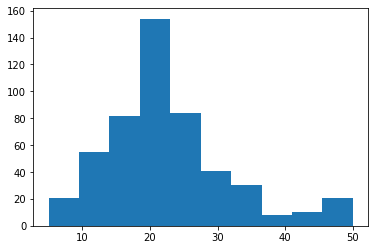

In [466]:
plt.hist(y);

(array([  1.,   6.,  21.,  56., 116., 136.,  76.,  58.,  25.,  11.]),
 array([-4.28131071,  0.6141287 ,  5.50956811, 10.40500752, 15.30044693,
        20.19588634, 25.09132575, 29.98676516, 34.88220457, 39.77764398,
        44.67308339]),
 <BarContainer object of 10 artists>)

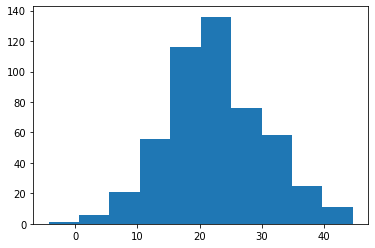

In [467]:
plt.hist(y_pred)

In [468]:
# Разбить выборку на train/valid, вычислить theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = linreg_linear(X_train, y_train)
y_pred = X_valid.dot(theta)
y_train_pred = X_train.dot(theta)

In [469]:
print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

MSE = 18.52, RMSE = 4.303
MSE = 22.99, RMSE = 4.794


In [470]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.679


In [471]:

lr0 = LinearRegression()
lr0.fit(X0,y)
y0_pred = lr0.predict(X0)
print_regression_metrics(y, y0_pred)

MSE = 21.89, RMSE = 4.679


### 1.2. Реализация линейной регрессии с использованием методов оптимизации

Для реализации линейной регрессии с помощью методов оптимизации будем использовать функцию ошибки **среднего квадратичного** ([Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)), которая является выпуклой функцией в n-мерном пространстве $\mathbb{R}^n$ и в общем виде выглядит следующим образом:
$$MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - a(x_i))^2}.$$
Здесь $x_i$ — вектор-признак $i$-го объекта обучающей выборки, $y_i$ — истинное значение для $i$-го объекта, $a(x)$ — алгоритм, предсказывающий для данного объекта $x$ целевое значение, $n$ — кол-во объектов в выборке.

В случае линейной регрессии $MSE$ представляется как:
$$MSE(X, y, \theta) = \frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2} = \frac{1}{2n} \lVert{y - X\theta}\rVert_{2}^{2}=\frac{1}{2n} (y - X\theta)^T(y - X\theta),$$
где $\theta$ — параметр модели линейной регрессии, $X$ — матрица объекты-признаки, $y$ - вектор истинных значений, соответствующих $X$.

Возьмем первый вариант представления функции ошибки и посчитаем ее градиент по параметру $\theta$, предварительно переименовав $MSE$ в $L$:
$$L=\frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2}$$
$$\nabla L = \frac{1}{n}\sum_{i=1}^{n}{(\theta^Tx_i - y_i) \cdot x_i} = \frac{1}{n}X^T(X\theta - y)$$

Исходя из полученного выражения градиента, реализуем алгоритм градиентного спуска:

In [77]:
# Реализовать функцию вычисления градиента функции MSE

def calc_mse_gradient(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
    
    return grad

In [78]:
# Реализовать функцию, осуществляющую градиентный шаг
# (функция должна содержать параметр величины шага alpha - learning rate)

def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

In [79]:
# Реализовать функцию цикла градиентного спуска с доп. параметрами
# начального вектора theta и числа итераций

def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta


In [95]:
# Разбить таблицу данных на матрицы X и y
X, y = data['data'], data['target']

# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
m = X.shape[1]

In [101]:
# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)

In [102]:
theta

array([7.41647399e+246, 3.32349992e+247, 7.39564172e+247, 8.96295209e+247,
       5.07578059e+245, 4.22030567e+246, 4.63094053e+247, 5.29083888e+248,
       2.65643383e+247, 8.19991211e+247, 3.27135991e+249, 1.38363846e+248,
       2.64323053e+249, 9.88835598e+247])

In [83]:
# Проверить максимальные значения по каждому признаку в данных
X.max(axis=0)

array([  1.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
         8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
       396.9   ,  37.97  ])

In [113]:
print(data['feature_names'][np.argmax(X.std(axis=0)) + 1])
print(np.max(X.std(axis=0)))

B
168.3704950393814


In [84]:
# Нормализовать даннные с помощью стандартной нормализации
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [85]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0)

array([1.        , 9.9339306 , 3.80423444, 2.42256516, 3.66839786,
       2.73234648, 3.55504427, 1.11749449, 3.96051769, 1.66124525,
       1.79819419, 1.63882832, 0.44105193, 3.54877081])

In [86]:
# Оптимизировать theta на новых данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)

In [87]:
theta

array([ 2.25328063e+01, -9.21740195e-01,  1.07033639e+00,  1.06388396e-01,
        6.86667316e-01, -2.05006416e+00,  2.68062168e+00,  1.40667969e-02,
       -3.10608483e+00,  2.57511475e+00, -1.97802851e+00, -2.05725099e+00,
        8.48690321e-01, -3.74025884e+00])

In [88]:
# Сделать предсказания при полученных параметрах
y_pred = X.dot(theta)

In [89]:
# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.90, RMSE = 4.68


In [90]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_mse_gradient, np.ones(m), 0.01, 5000)
y_pred = X_valid.dot(theta)

print_regression_metrics(y_valid, y_pred)

MSE = 20.44, RMSE = 4.52
